In [18]:
import sys
import os
sys.path.append('../')

In [19]:
from nustar_scripts.nu_pyxspec import scan_containers_ph_res, ph_res_param, Model, Fit, Plot, xspec,  AllModels
from nustar_scripts.nu_utils import set_mpl 
from nustar_scripts.nu_class import NustarObservation, glob
from nustar_scripts.pulsar_init import Nu_path, ObsList_bright, plot_path, ObsAlias, analysis_path
%matplotlib inline 
set_mpl('Pastel2')

AllModels.lmod('relxill', '/Users/sdbykov/work/xray_pulsars/sj0243_nu/python_for_nustar/relxill_model/') #set path to relxill model


def pf_and_relative_var(observable):
    o_min = np.min(observable)
    o_max = np.max(observable)
    pf = (o_max-o_min)/(o_max+o_min)
    rel = o_max/o_min - 1 
    return pf, rel

def plot_results_all(ObsID, model = 'relxilllp', plot_refl_flux = True):

    fig = plt.figure(figsize=(8, 12))
    plt.subplots_adjust(hspace=0)
    plt.subplots_adjust(wspace=0)
    rows, cols = 6,  1
    # (rows,cols), (y,x) <- those are coordinates of an axis in subplots
    ax1 = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1, sharex = ax1)
    ax3 = plt.subplot2grid((rows, cols), (2, 0), rowspan=1, colspan=1, sharex = ax1)
    ax4 = plt.subplot2grid((rows, cols), (3, 0), rowspan=1, colspan=1, sharex = ax1)
    ax5 = plt.subplot2grid((rows, cols), (4, 0), rowspan=1, colspan=1, sharex = ax1)
    ax6 = plt.subplot2grid((rows, cols), (5, 0), rowspan=1, colspan=1, sharex = ax1)

    nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
    #ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
    ph_res_folder = nu_obs.products_path+'/phase_resolved/'
    os.chdir(ph_res_folder)


    df_ph_res = scan_containers_ph_res(model)

    ph_res_param(df_ph_res, comp = 'relxilllp',     par =  'refl_frac',  ax = ax2, plot = True)

    ph_res_param(df_ph_res, comp = 'relxilllp',     par =  'gamma',  lw = 3, ax = ax4)

    ph_res_param(df_ph_res, comp = 'relxilllp',     par =  'Ecut',  lw = 3, ax = ax5)

    ph_res_param(df_ph_res, comp = 'relxilllp',     par =  'norm',  lw = 3, ax = ax6)


    if plot_refl_flux:
        phases = np.arange(0, 10)
        phases = phases/10+0.05
        phases = np.concatenate((phases, phases+1))#np.tile(phases, 2)
        refl_flux, direct_flux = refl_fluxes[ObsID]
        pf_refl, R_refl = pf_and_relative_var(refl_flux)
        pf_direct, R_direct = pf_and_relative_var(direct_flux)
        
        print(f'Obs {ObsID}: reflected flux  PF = {pf_refl}; R = {R_refl}')
        print(f'Obs {ObsID}: direct flux  PF = {pf_direct}; R = {R_direct}')

        refl_flux = np.tile(refl_flux, 2)/refl_flux.mean()
        direct_flux = np.tile(direct_flux, 2)/direct_flux.mean()

        ax3.step(phases, refl_flux/1e-9, ls = '-', color = 'C4', alpha = 0.9, lw = 3, where = 'mid', zorder = -1, label = 'Reflected')
        ax3.step(phases, direct_flux/1e-9, ls = '-', color = 'C0', alpha = 0.9, lw = 3, where = 'mid', zorder = -1, label = 'Direct')
        ax3.set_yscale('log')
        #ax3.grid(False)
        ax3.set_ylabel('Flux \n 10$^{-9}$ erg cm$^{-2}$ s$^{-1}#$', fontsize = 12)
        ax3.legend()



    fs = 12
    ax1.set_ylabel('Rate 4-79 keV, \n ${\\rm cts}\,{\\rm s}^{-1}$', fontsize = fs)
    ax2.set_ylabel(r'$f_{refl}$', fontsize = fs)
    ax4.set_ylabel(r'$\Gamma$', fontsize = fs)
    ax5.set_ylabel('$E_{cut}$, \n keV', fontsize = fs)
    ax6.set_ylabel('relxilllp \n norm', fontsize = fs)

    [ax.legend([]) for ax in [ax2,ax3,ax4,ax5]]
    ax3.legend()
    #ax4.set_title('')
    ax1.set_title(ObsAlias[ObsID], loc = 'center')



    efolds = glob('*.efold')
    _, phase_colors = nu_obs.plot_efolds_of_bins(prodpath='phase_resolved', efolds_files = efolds , ax_efold = ax1, fig = fig, save = False, legend=False, phase_zero_efold_file='phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold')


    fig.tight_layout()
    plt.subplots_adjust(hspace = 0)
    return df_ph_res, fig

def plot_results(ObsID, model = 'relxilllp', plot_refl_flux = True):

    fig = plt.figure(figsize=(8, 5))
    plt.subplots_adjust(hspace=0)
    plt.subplots_adjust(wspace=0)
    rows, cols = 3,  1
    # (rows,cols), (y,x) <- those are coordinates of an axis in subplots
    ax1 = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1, sharex = ax1)
    ax3 = plt.subplot2grid((rows, cols), (2, 0), rowspan=1, colspan=1, sharex = ax1)

    nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
    #ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
    ph_res_folder = nu_obs.products_path+'/phase_resolved/'
    os.chdir(ph_res_folder)


    df_ph_res = scan_containers_ph_res(model)

    ph_res_param(df_ph_res, comp = 'relxilllp',     par =  'refl_frac',  ax = ax2, plot = True)

    if plot_refl_flux:
        phases = np.arange(0, 10)
        phases = phases/10+0.05
        phases = np.concatenate((phases, phases+1))#np.tile(phases, 2)
        refl_flux, direct_flux = refl_fluxes[ObsID]
        pf_refl, R_refl = pf_and_relative_var(refl_flux)
        pf_direct, R_direct = pf_and_relative_var(direct_flux)
        
        print(f'Obs {ObsID}: reflected flux  PF = {pf_refl}; R = {R_refl}')
        print(f'Obs {ObsID}: direct flux  PF = {pf_direct}; R = {R_direct}')

        refl_flux = np.tile(refl_flux, 2)/refl_flux.mean()
        direct_flux = np.tile(direct_flux, 2)/direct_flux.mean()
        
        #refl_flux = np.tile(refl_flux, 2)/1e-9
        #direct_flux = np.tile(direct_flux, 2)/1e-9

        ax3.step(phases, refl_flux, ls = '-', color = 'C0', alpha = 1, lw = 3, where = 'mid', zorder = -1, label = 'Reflected')
        ax3.step(phases, direct_flux, ls = '-', color = 'C6', alpha = 1, lw = 3, where = 'mid', zorder = -1, label = 'Direct')
        #ax3.set_yscale('log')
        #ax3.grid(False)
        #ax3.set_ylabel('Flux \n 10$^{-9}$ erg cm$^{-2}$ s$^{-1}#$', fontsize = 12)
        ax3.set_ylabel('Flux/mean', fontsize = 12)
        ax3.legend(loc = 'lower right')



    fs = 12
    ax1.set_ylabel('Rate 4-79 keV, \n ${\\rm cts}\,{\\rm s}^{-1}$', fontsize = fs)
    ax2.set_ylabel(r'$f_{refl}$', fontsize = fs)
    ax3.set_xlabel('Phase', fontsize = fs)
    ax2.legend([])
    #ax4.set_title('')
    ax1.set_title(ObsAlias[ObsID], loc = 'center')



    efolds = glob('*.efold')
    _, phase_colors = nu_obs.plot_efolds_of_bins(prodpath='phase_resolved', efolds_files = efolds , ax_efold = ax1, fig = fig, save = False, legend=False, phase_zero_efold_file='phase_resolved_bin1AB_sr.lc_bary_orb_corr_nphase_128.efold')


    #fig.tight_layout()
    #plt.subplots_adjust(hspace = 0)
    plt.tight_layout()
    plt.show()
    return df_ph_res, fig




def calc_reflection_and_direct_flux(ObsID, model = 'relxilllp', elo = '4.', ehi = '79.'):
    bin_numbers = 10
    fluxes_refl = []
    fluxes_direct = []
    for i, bin_number in enumerate(range(1,bin_numbers+1)):
        os.chdir(f"{analysis_path}out{ObsID}/products/phase_resolved")
        xspec.AllData.clear()
        xspec.AllModels.clear()
        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_bin{bin_number}_shift0_{model}.xcm_model')

        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        refl_fract = f"{refl_fract:.2f}"

        mo_loaded.relxilllp.refl_frac = "-"+str(refl_fract)
        mo_loaded.bbodyrad.norm = '0 -1'
        mo_loaded.phabs.nH = '0 -1'
        AllModels.calcFlux(f"{elo} {ehi}")
        fl = AllModels(1).flux[0]
        fluxes_refl.append(fl)


        xspec.AllData.clear()
        xspec.AllModels.clear()
        model = 'relxilllp'
        xspec.Xset.restore(f'./xspec/{model}/xcm/{ObsID}_bin{bin_number}_shift0_{model}.xcm_model')

        mo_loaded = xspec.AllModels(1)
        refl_fract = mo_loaded.relxilllp.refl_frac.values[0]
        refl_fract = f"{refl_fract:.2f}"

        mo_loaded.relxilllp.refl_frac = '0 -1'
        mo_loaded.bbodyrad.norm = '0 -1'
        mo_loaded.phabs.nH = '0 -1'
        AllModels.calcFlux(f"{elo} {ehi}")
        fl = AllModels(1).flux[0]
        fluxes_direct.append(fl)


    fluxes_refl = np.array(fluxes_refl)
    fluxes_direct = np.array(fluxes_direct)
    pf_refl, R_refl = pf_and_relative_var(fluxes_refl)
    pf_direct, R_direct = pf_and_relative_var(fluxes_direct)

    print(f'Obs {ObsID}: reflected emission  PF = {pf_refl}; R = {R_refl}')
    print(f'Obs {ObsID}: direct emission  PF = {pf_direct}; R = {R_direct}')
    return fluxes_refl,  fluxes_direct


In [20]:
refl_fluxes = {}
for ObsID in [ObsList_bright[1],ObsList_bright[2], ObsList_bright[3]]:
#for ObsID in [ObsList_bright[1]]:
    tmp = calc_reflection_and_direct_flux(ObsID, ehi = '50.')
    refl_fluxes[ObsID] = tmp


Obs 90302319004: reflected emission  PF = 0.23030807903375267; R = 0.5984422410063264
Obs 90302319004: direct emission  PF = 0.5393111361608859; R = 2.3413248224260492
Obs 90302319006: reflected emission  PF = 0.39583979032042266; R = 1.310380207032702
Obs 90302319006: direct emission  PF = 0.6585295558101761; R = 3.8570222812261834
Obs 90302319008: reflected emission  PF = 0.16917061430189528; R = 0.4072331027621263
Obs 90302319008: direct emission  PF = 0.3489156318046775; R = 1.0717985221233395


###
Observation 90302319004 loaded successfully
Obs 90302319004: reflected flux  PF = 0.23030807903375267; R = 0.5984422410063264
Obs 90302319004: direct flux  PF = 0.5393111361608859; R = 2.3413248224260492


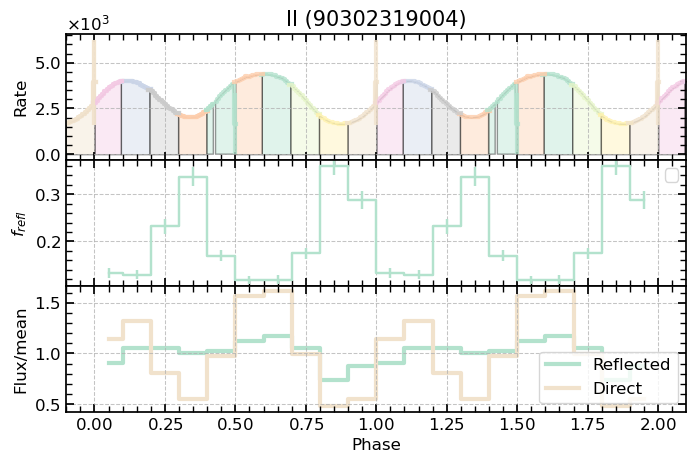

<Figure size 1000x1000 with 0 Axes>

###
Observation 90302319006 loaded successfully
Obs 90302319006: reflected flux  PF = 0.39583979032042266; R = 1.310380207032702
Obs 90302319006: direct flux  PF = 0.6585295558101761; R = 3.8570222812261834


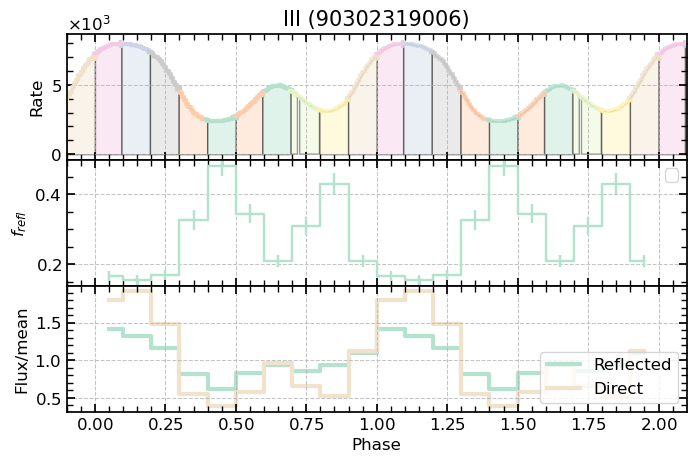

<Figure size 1000x1000 with 0 Axes>

###
Observation 90302319008 loaded successfully
Obs 90302319008: reflected flux  PF = 0.16917061430189528; R = 0.4072331027621263
Obs 90302319008: direct flux  PF = 0.3489156318046775; R = 1.0717985221233395


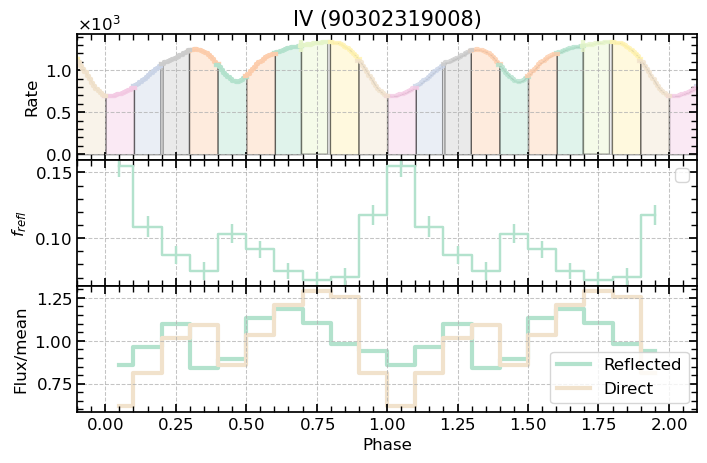

<Figure size 1000x1000 with 0 Axes>

In [21]:
_, fig1 = plot_results(ObsList_bright[1]);

_, fig2 = plot_results(ObsList_bright[2]);

_, fig3 = plot_results(ObsList_bright[3]);

fig1.savefig(plot_path+ '/ph-res/high1.pdf')
fig2.savefig(plot_path+ '/ph-res/high2.pdf')
fig3.savefig(plot_path+ '/ph-res/high3.pdf')
